# Time Series Data Analysis of Selected Low-Cost Funds

I have downloaded data of 10 different funds from finance.yahoo.com and manually merged their daily closing prices by date starting 01-01-2014. Each of these funds represent different classes of assets which vary in risk. For investors, higher risk can yield more attractive returns; however, if an investor is risk averse they would look to other asset classes to diversify their portfolio and the risk it carries. 

The ideal goal of this data analysis would be to understand how much weigh to give to each of these funds on a diversified portfolio in order to achieve a specified risk/return rate.

#### A brief description of each of the funds I decided to study:

| Fund Name | Description|
|------|------|
|  VOO  | Invests in stocks in the S&P 500 Index, representing 500 of the largest U.S. companies. |
|  VTSMX | Provides investors with exposure to the entire U.S. equity market, including small-, mid-, and large-cap growth and value stocks. |
|  SWTSX | A convenient, low-cost way to capture the performance of the entire U.S. stock market. |
|  VGTSX | Offers exposure to both developed and emerging international economies, with the exception of the United States. |
| VEIEX | The fund invests in stocks of companies located in emerging markets around the world, such as Brazil, Russia, India, Taiwan, and China. |
| VFITX | Invests in debt issued directly by the government in the form of intermediate-term Treasuries which have reduced risk of defaults. |
| VIPSX |  Invests in bonds that are backed by the full faith and credit of the federal government and whose principal is adjusted quarterly based on inflation. In addition to typical movement in bond prices, income can fluctuate more in this fund because payments depend on inflation changes. |
| VGSIX | This fund invests in real estate investment trusts—companies that purchase office buildings, hotels, and other real estate property. |
| TLT | Tracks a market-weighted index of debt issued by the US Treasury with remaining maturities of 20 years or more. |
| IBMH | Tracks the investment results of an index composed of investment-grade U.S. municipal bonds maturing after May 31 and before September 2, 2019. |

#### Importing libraries I will need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Loading data and understanding what the data looks like

In [3]:
mfunds = pd.read_csv("MFData.csv")
mfunds.head()

,Date,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
0,02-01-14,167.630005,46.259998,33.369999,16.510000,25.430000,11.14,13.03,21.430000,102.169998,25.13
1,03-01-14,167.479996,46.279999,33.380001,16.500000,25.260000,11.13,13.03,21.590000,102.169998,25.13
2,06-01-14,167.059998,46.130001,33.279999,16.480000,25.049999,11.15,13.06,21.690001,102.599998,25.13
3,07-01-14,168.100006,46.439999,33.500000,16.530001,25.080000,11.16,13.07,21.760000,102.860001,25.13
4,08-01-14,168.169998,46.459999,33.509998,16.520000,25.020000,11.12,13.06,21.680000,102.580002,25.13


#### Need to clean the data to make it more workable

In [4]:
# creating a new dataframe with 'date' column as index
data = mfunds.set_index('Date')

data.head() 

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
Date,,,,,,,,,,
02-01-14,167.630005,46.259998,33.369999,16.510000,25.430000,11.14,13.03,21.430000,102.169998,25.13
03-01-14,167.479996,46.279999,33.380001,16.500000,25.260000,11.13,13.03,21.590000,102.169998,25.13
06-01-14,167.059998,46.130001,33.279999,16.480000,25.049999,11.15,13.06,21.690001,102.599998,25.13
07-01-14,168.100006,46.439999,33.500000,16.530001,25.080000,11.16,13.07,21.760000,102.860001,25.13
08-01-14,168.169998,46.459999,33.509998,16.520000,25.020000,11.12,13.06,21.680000,102.580002,25.13


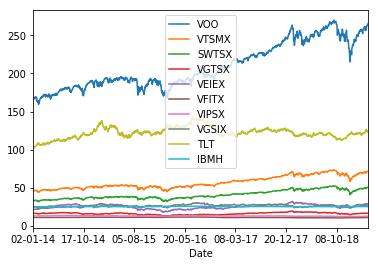

In [5]:
data.plot()

#### Need to make my visualization more interpretable

Populating the interactive namespace from numpy and matplotlib


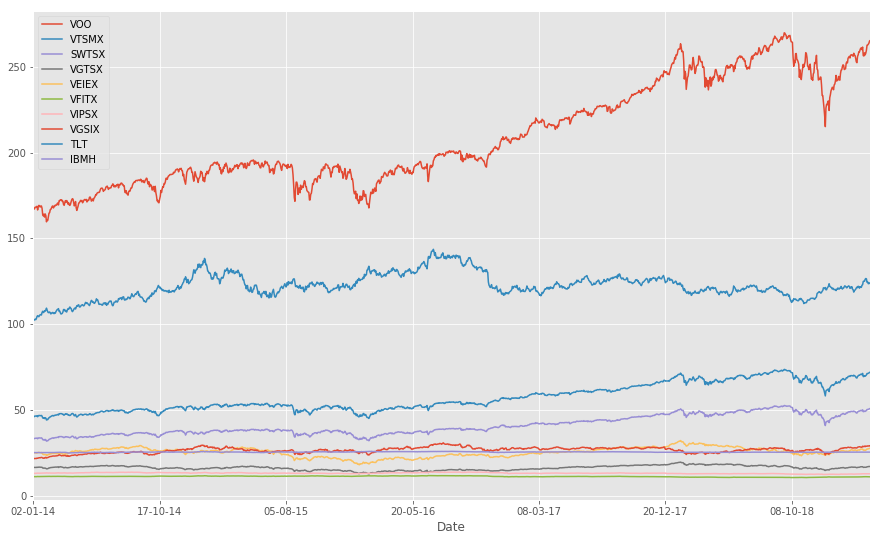

In [6]:
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

data.plot()

We can actually learn form the above plot that TLT is slightly counter-cyclical to the general market trends represented by the rest (We will see below that general trend is reflected by VOO when compared to the Dow Jones Index since VOO contains most of the securities that make up the index. In fact, the bottom couple of lines are also a bit difficult to explore so I will omit the higher priced funds to be able to look at them more closely.

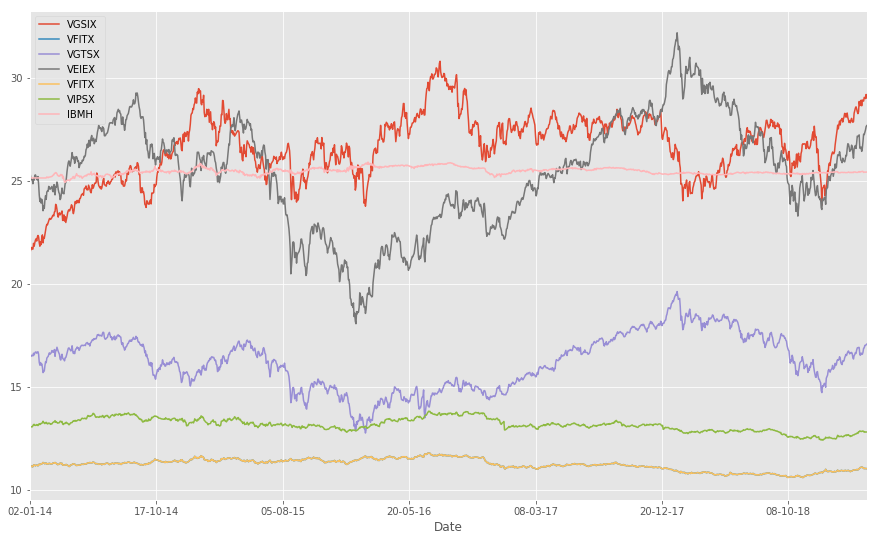

In [7]:
columns = ['VGSIX', 'VFITX', 'VGTSX', 'VEIEX', 'VFITX', 'VIPSX', 'IBMH']
df1 = pd.DataFrame(data, columns=columns)
df1.plot()

It seems that VGSIX does not always convey market trends. We can ignore the flatter lines for IBMH, VPSIX, and VFITX as they contains treasury bonds and assets that are designed to be stable and combat losses to inflation. I will study the correlation of each compared to the market index below. First I will have to retrieve the data for the Dow Jones Market Index and merge it to my current dataset.

#### Merging the new data for Dow Jones Index to mycurrent dataset

In [8]:
mindex = pd.read_csv("DJI.csv") #get the data
mindex = pd.DataFrame(mindex, columns=['Date','Close']) # selecting the columns I want
mindex.columns= ['Date','DJI'] #Rename the column from Close to DJI
mindex.head()

,Date,DJI
0,2014-01-02,16441.349609
1,2014-01-03,16469.990234
2,2014-01-06,16425.099609
3,2014-01-07,16530.939453
4,2014-01-08,16462.740234


In [9]:
#Merging mindex with data using pd.concat()
data1 = data.reset_index(drop=True) #required to join without encountering a bug that wipes the data
newdata = pd.concat([data1,mindex], axis=1)
#newdata = data.join(mindex)
newdata.set_index("Date", inplace=True, drop=True) #setting Date back as the index again
newdata.head()

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH,DJI
Date,,,,,,,,,,,
2014-01-02,167.630005,46.259998,33.369999,16.510000,25.430000,11.14,13.03,21.430000,102.169998,25.13,16441.349609
2014-01-03,167.479996,46.279999,33.380001,16.500000,25.260000,11.13,13.03,21.590000,102.169998,25.13,16469.990234
2014-01-06,167.059998,46.130001,33.279999,16.480000,25.049999,11.15,13.06,21.690001,102.599998,25.13,16425.099609
2014-01-07,168.100006,46.439999,33.500000,16.530001,25.080000,11.16,13.07,21.760000,102.860001,25.13,16530.939453
2014-01-08,168.169998,46.459999,33.509998,16.520000,25.020000,11.12,13.06,21.680000,102.580002,25.13,16462.740234


#### Correlation study with Dow Jones Market Index

From the below correlation table, we recognize reduced correlation for VGTSX, VEIEX, and VGSIX. We have negative correlation for VFITX, VIPSX, TLT, and IBMH. This confirms our visual analysis from our first plots.
Will re-raw the correlation table with a color map as reference in case we need to look for insights in the future. Source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

In [10]:
corr = newdata.corr()
corr.style.background_gradient(cmap='RdBu_r', axis=None).set_precision(3) # 'coolwarm', RdBu_r', & 'BrBG' good color maps

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH,DJI
VOO,1,0.999,0.997,0.542,0.492,-0.795,-0.668,0.341,0.0176,-0.117,0.994
VTSMX,0.999,1,0.998,0.562,0.511,-0.804,-0.666,0.33,-0.00184,-0.141,0.993
SWTSX,0.997,0.998,1,0.577,0.524,-0.806,-0.654,0.323,-0.0132,-0.153,0.99
VGTSX,0.542,0.562,0.577,1,0.953,-0.609,-0.219,-0.147,-0.39,-0.52,0.565
VEIEX,0.492,0.511,0.524,0.953,1,-0.51,-0.105,-0.0605,-0.274,-0.434,0.514
VFITX,-0.795,-0.804,-0.806,-0.609,-0.51,1,0.784,0.203,0.543,0.566,-0.829
VIPSX,-0.668,-0.666,-0.654,-0.219,-0.105,0.784,1,0.145,0.339,0.317,-0.699
VGSIX,0.341,0.33,0.323,-0.147,-0.0605,0.203,0.145,1,0.775,0.63,0.277
TLT,0.0176,-0.00184,-0.0132,-0.39,-0.274,0.543,0.339,0.775,1,0.828,-0.0416
IBMH,-0.117,-0.141,-0.153,-0.52,-0.434,0.566,0.317,0.63,0.828,1,-0.175


### Assessment of returns

I need to build new tables from the original dataset (excluding the Dow Jones Index) to assess the returns for each investable fund. The return can be calculated by return(t,0) = price(t)/price(0). source: https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

In [11]:
returns = data.pct_change()
returns.head()

,VOO,VTSMX,SWTSX,VGTSX,VEIEX,VFITX,VIPSX,VGSIX,TLT,IBMH
Date,,,,,,,,,,
02-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-01-14,-0.000895,0.000432,0.000300,-0.000606,-0.006685,-0.000898,0.000000,0.007466,0.000000,0.0
06-01-14,-0.002508,-0.003241,-0.002996,-0.001212,-0.008314,0.001797,0.002302,0.004632,0.004209,0.0
07-01-14,0.006225,0.006720,0.006611,0.003034,0.001198,0.000897,0.000766,0.003227,0.002534,0.0
08-01-14,0.000416,0.000431,0.000298,-0.000605,-0.002392,-0.003584,-0.000765,-0.003676,-0.002722,0.0


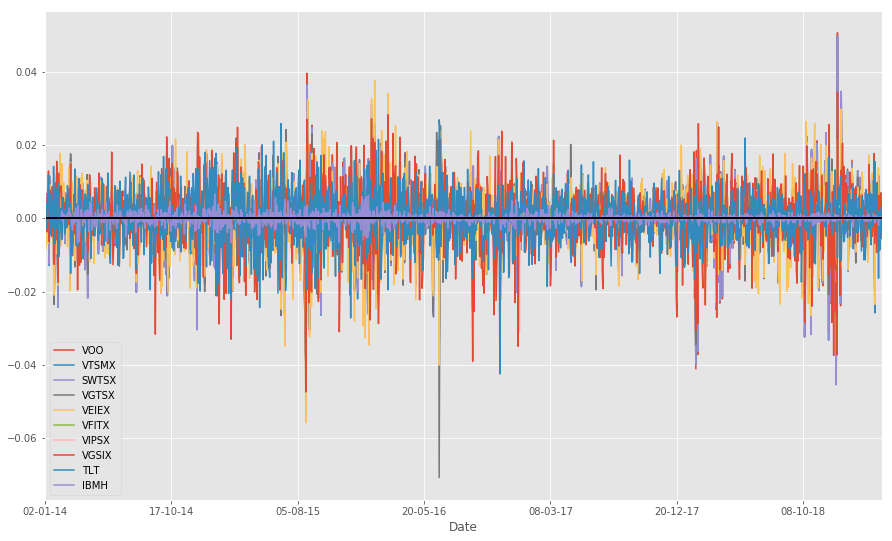

In [12]:
returns.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

# Efficient Frontier and Optimization

In [13]:
#Creating new dataframe so that I can select what funds I want to plot in my portfolio
optcolumns = ['VOO','SWTSX','TLT','VGSIX','VTSMX']
#'VGTSX','VGSIX']
#['VTSMX', 'VOO']

optdata = pd.DataFrame(data, columns=optcolumns) 
optdata.head(1)

,VOO,SWTSX,TLT,VGSIX,VTSMX
Date,,,,,
02-01-14,167.630005,33.369999,102.169998,21.43,46.259998


### Sharpe Ratio

The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.


$$Sharpe\;Ratio = \frac{(R_p−R_f)}{σ_p}$$

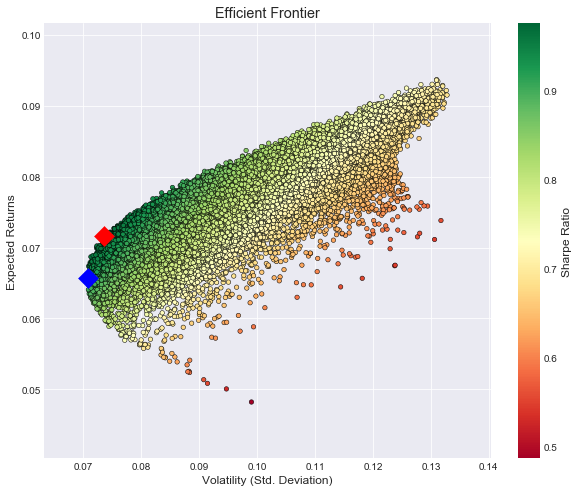

In [14]:
# calculate daily and annual returns of the stocks
returns_daily = optdata.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []



selected = list(optdata.columns.values)


# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000


#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]


# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()


# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True, ax=ax)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [15]:
# print the details of the 2 special portfolios
print("The min variance portfolio: \n"+ str(min_variance_port.T))
print("\n")

print("The sharpe optimized portfolio: \n"+ str(sharpe_portfolio.T))

The min variance portfolio: 
                 33457
Returns       0.065693
Volatility    0.070728
Sharpe Ratio  0.928803
VOO Weight    0.206426
SWTSX Weight  0.132907
TLT Weight    0.538760
VGSIX Weight  0.004786
VTSMX Weight  0.117121


The sharpe optimized portfolio: 
                  6373
Returns       0.071695
Volatility    0.073484
Sharpe Ratio  0.975661
VOO Weight    0.521349
SWTSX Weight  0.012090
TLT Weight    0.445023
VGSIX Weight  0.005808
VTSMX Weight  0.015730


## Minimum Variance Portfolio Mix

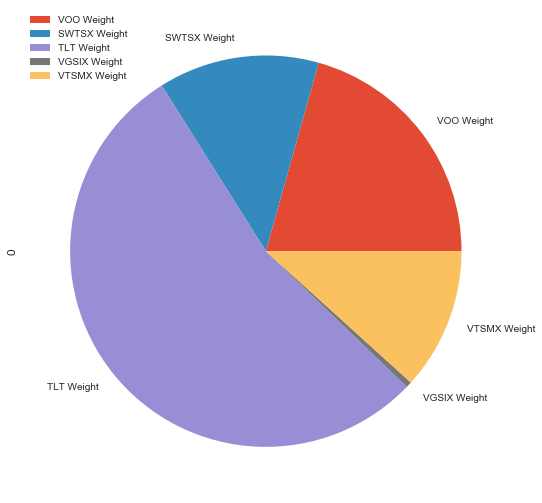

In [16]:
minpie = list(min_variance_port.columns)

minpie.remove('Returns')
minpie.remove('Volatility')
minpie.remove('Sharpe Ratio')

minpie = pd.DataFrame(min_variance_port, columns=minpie)
minpie = minpie.reset_index()
minpie = minpie.drop('index',axis=1)
minpie=minpie.transpose()
minpie.plot(kind='pie',y=0)

## Maximized Sharpe Ratio Portfolio Mix

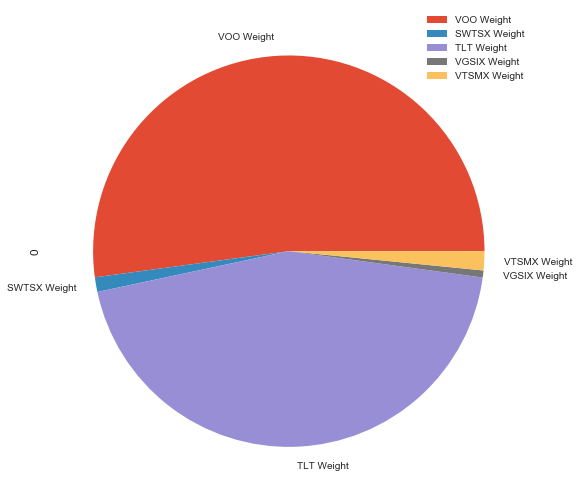

In [17]:
sharpie = list(sharpe_portfolio.columns)

sharpie.remove('Returns')
sharpie.remove('Volatility')
sharpie.remove('Sharpe Ratio')

sharpie = pd.DataFrame(sharpe_portfolio, columns=sharpie)
sharpie = sharpie.reset_index()
sharpie = sharpie.drop('index',axis=1)
sharpie=sharpie.transpose()
sharpie.plot(kind='pie',y=0)

## Machine Learning Demonstration

##### Going to set up a regression in order to predict price of the market index on a given date

In [162]:
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = mindex
df = df.drop(['Date'], axis = 1)

prices = df['DJI'].tolist()
dates = df.index.tolist()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

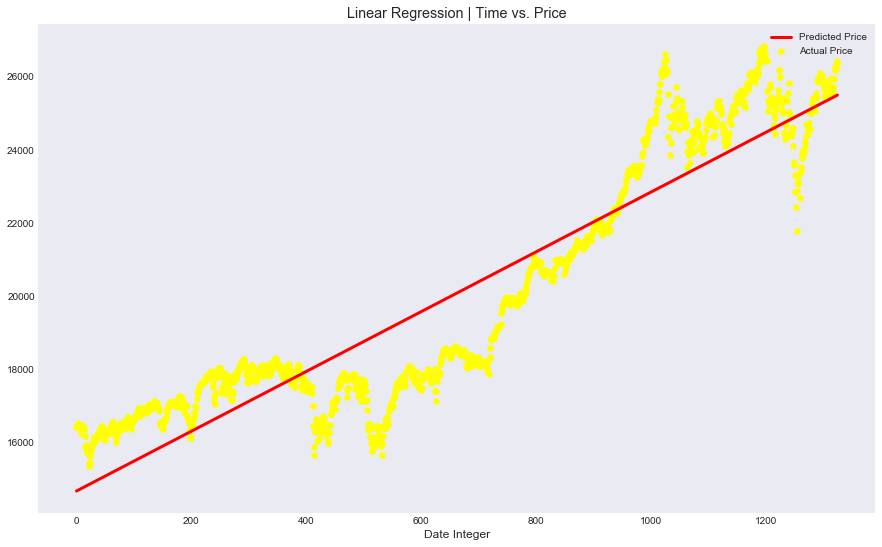

In [163]:
#Define Linear Regressor Object
regressor = LinearRegression()
regressor.fit(dates, prices)

#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

In [164]:
#Predict Price on Given Date
date = [[12]]
predicted_price =regressor.predict(date)
print(predicted_price[0][0], regressor.coef_[0][0], regressor.intercept_[0])

14779.873763860314 8.167042466772815 14681.86925425904


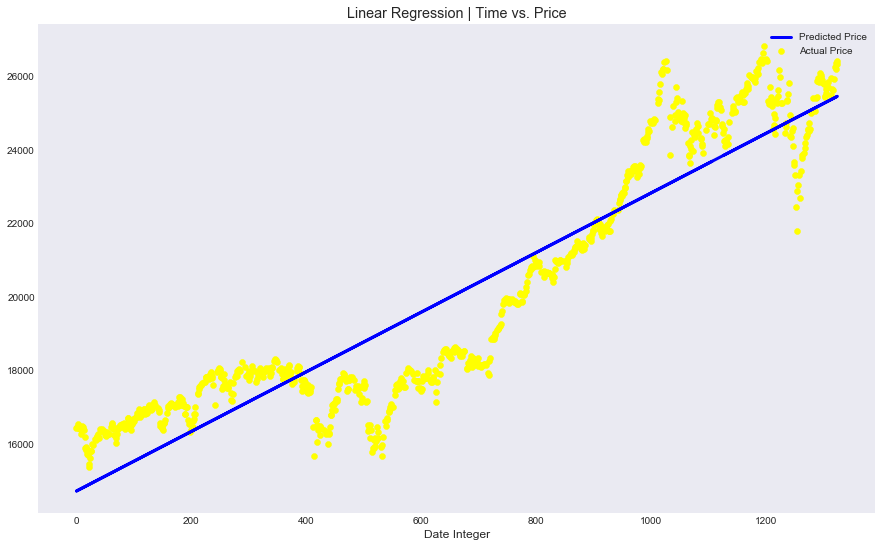

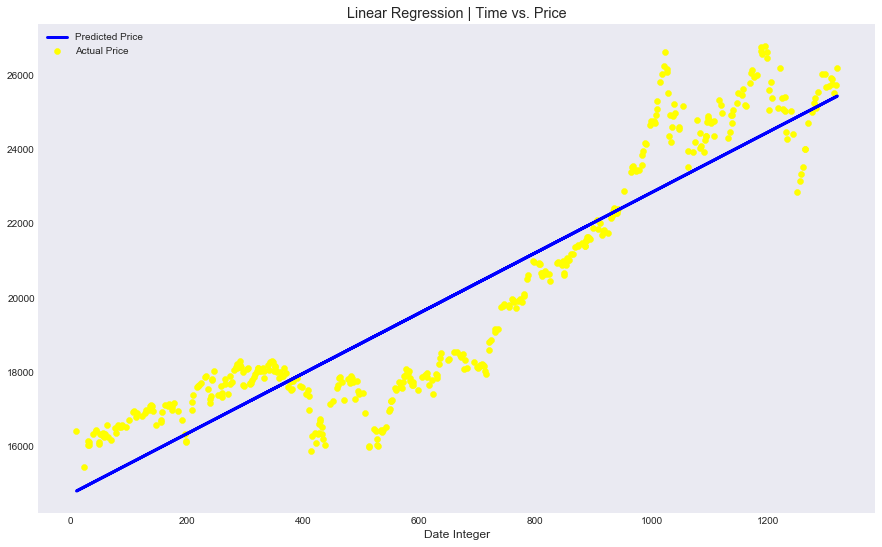

In [165]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=.33, random_state=42)
regressor.fit(xtrain, ytrain)

#Train Set Graph
plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Test Set Graph
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()